<a href="https://colab.research.google.com/github/K-Srivalli-Varshini/AICTE--Internship-on-AI-Transformative-Learning-with-TechSaksham/blob/main/identifying_shopping_trends_using_data_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install WordCloud

In [ ]:
from re import A
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [ ]:
#reading the data set
shop=pd.read_csv('/content/drive/MyDrive/ED/shopping_trends_updated.csv')


In [ ]:
shop.shape

(3900, 18)

In [ ]:
shop.to_excel('/content/drive/MyDrive/ED/shopping_trends_updated.xlsx')

In [ ]:
shop.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
shop.dtypes

,0
Customer ID,int64
Age,int64
Gender,object
Item Purchased,object
Category,object
Purchase Amount (USD),int64
Location,object
Size,object
Color,object
Season,object


In [ ]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [ ]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
shop.shape

(3900, 18)

In [ ]:
shop.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [ ]:
shop_dup=shop.duplicated().sum()
shop_dup

0

In [ ]:
print(f"the unique values of the 'Gender' column are: {shop['Gender'].unique()}")


the unique values of the 'Gender' column are: ['Male' 'Female']


In [ ]:
shop.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [ ]:
shop.describe(include='object')

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,675,2223,2223,677,584


In [ ]:
print(f"the unique values of the 'Category' column are: {shop['Category'].unique()}")


the unique values of the 'Category' column are: ['Clothing' 'Footwear' 'Outerwear' 'Accessories']


In [ ]:
print(f"the unique values of the 'Size' column are: {shop['Size'].unique()}")
# This will print a blank line
print()
print(f"the unique values of the 'Subscription Status' column are: {shop['Subscription Status'].unique()}")
# This will print a blank line
print()
print(f"the unique values of the 'Shipping Type' column are: {shop['Shipping Type'].unique()}")
# This will print a blank line
print()
print(f"the unique values of the 'Discount Applied' column are: {shop['Discount Applied'].unique()}")
# This will print a blank line
print()
print(f"the unique values of the 'Payment Method' column are: {shop['Payment Method'].unique()}")
# This will print a blank line
print()
print(f"the unique values of the 'Promo Code Used' column are: {shop['Promo Code Used'].unique()}")

the unique values of the 'Size' column are: ['L' 'S' 'M' 'XL']

the unique values of the 'Subscription Status' column are: ['Yes' 'No']

the unique values of the 'Shipping Type' column are: ['Express' 'Free Shipping' 'Next Day Air' 'Standard' '2-Day Shipping'
 'Store Pickup']

the unique values of the 'Discount Applied' column are: ['Yes' 'No']

the unique values of the 'Payment Method' column are: ['Venmo' 'Cash' 'Credit Card' 'PayPal' 'Bank Transfer' 'Debit Card']

the unique values of the 'Promo Code Used' column are: ['Yes' 'No']




OBSERVATION:

At our first glance at the dataset, it is clear that we have great and robust set of data made up of **39,000 rows** and **18 columns**. There are no blanks or missing data points hence, we can go ahead and analyze the data.

Moving on, let’s explore the columns and their relevance to the analysis and understanding of our customers:

1. **Customer ID:**  
     
   A specific number assigned to a customer which helps in identifying different customers.

2. **Age:**  

   This shows the age range of our customers and what we can expect of them such as what they buy.

3. **Gender:**  

   The data shows the sex of customers which allows for assessing the buying patterns of the respective sex.

4. **Items Purchased:**  

   This shows which items have been purchased by the customers, giving an idea about what is in demand.

5. **Category:**  

   It classifies the items into their various types for example, clothing, footwear, etc. It helps in trend analysis in relation to the categories.

6. **Purchase Amount (USD):**  

   It shows how much a customer spends on his purchases and helps us understand the amount he is willing to spend.

7. **Location:**  

   This shows where the customers are located which is useful in tracing geographical trends and preference.


8. **Size**:  
   Denotes the size of the purchased products, assisting in understanding size preferences across categories.

9. **Color**:  
   Reflects customer color preferences, aiding in trend analysis and understanding the impact on purchasing decisions.

10. **Season**:  
    Identifies the season during which purchases were made, enabling exploration of seasonal shopping trends.

11. **Review Rating**:  
    Shows customer ratings, providing valuable feedback on product satisfaction and quality.

12. **Subscription Status**:  
    Indicates whether customers have opted for a subscription, helping to understand customer loyalty and engagement.

13. **Shipping Type**:  
    Identifies the shipping methods used for delivery, shedding light on preferred shipping options.

14. **Discount Applied**:  
    Shows whether a discount was applied to purchased products, enabling analysis of the impact of discounts on customer behavior.

15. **Promo Code Used**:  
    Indicates whether customers utilized promo codes during purchases, helping evaluate the effectiveness of promotional campaigns.

16. **Previous Purchases**:  
    Reveals the number of previous purchases made by customers, aiding in understanding customer loyalty and repeat business.

17. **Payment Method**:  
    Displays the various methods used by customers to make purchases, allowing analysis of preferred payment options.

18. **Frequency of Purchases**:  
    Provides insights into how often customers make purchases, helping identify patterns and buying habits.

---

With this rich and diverse dataset, we are well-equipped to explore customer shopping trends, understand their preferences, and uncover valuable insights. These insights can drive informed decision-making and enhance the overall customer experience.

#1 What is the overall distribution of customer ages in the dataset?

In [ ]:
shop['Age'].value_counts()


,count
Age,
69,88
57,87
41,86
25,85
49,84
50,83
54,83
27,83
62,83


In [ ]:
shop['Age'].mean()


44.06846153846154

In [ ]:
shop['Gender'].unique()


array(['Male', 'Female'], dtype=object)

In [ ]:
# Categorize the 'Age' column into age groups
shop['Age_category'] = pd.cut(shop['Age'], bins=[0, 10, 15, 18, 30, 50, 70],
                              labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Middle Aged', 'Senior'])


In [ ]:
 #Create a histogram based on the 'Age_category'
fig = px.histogram(shop, x='Age_category', title='Age Distribution by Category')

fig.show()

2.How does the average purchase amount vary across different product categories

In [ ]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [ ]:
shop['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [ ]:
shop.groupby('Category')['Purchase Amount (USD)'].mean()

,Purchase Amount (USD)
Category,
Accessories,59.838710
Clothing,60.025331
Footwear,60.255426
Outerwear,57.172840


#3 Which gender has the highest number of purchases?

In [ ]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

<Axes: xlabel='Gender', ylabel='Purchase Amount (USD)'>

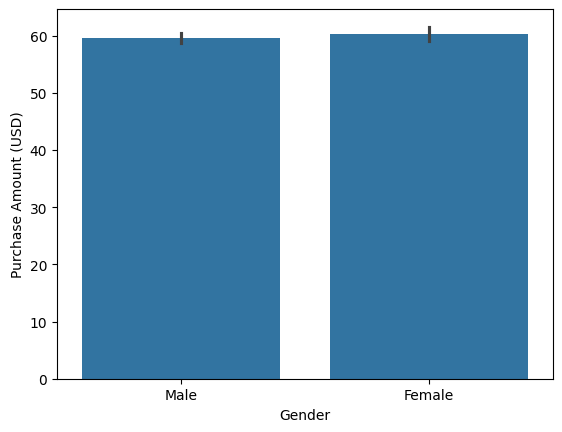

In [ ]:
sns.barplot(shop,x='Gender',y='Purchase Amount (USD)')

#4.what are the most commonly purchased items in each category?

In [ ]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [ ]:
shop.groupby('Category')['Item Purchased'].value_counts()

Category     Item Purchased
Accessories  Jewelry           171
             Belt              161
             Sunglasses        161
             Scarf             157
             Hat               154
             Handbag           153
             Backpack          143
             Gloves            140
Clothing     Blouse            171
             Pants             171
             Shirt             169
             Dress             166
             Sweater           164
             Socks             159
             Skirt             158
             Shorts            157
             Hoodie            151
             T-shirt           147
             Jeans             124
Footwear     Sandals           160
             Shoes             150
             Sneakers          145
             Boots             144
Outerwear    Jacket            163
             Coat              161
Name: count, dtype: int64

In [ ]:
fig=px.histogram(shop,x='Item Purchased',color='Category')
fig.show()

#5. Are there any specific seasons or months where customers spending is significantly higher?

In [ ]:
shop['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [ ]:
shop['Season'].value_counts()

,count
Season,
Spring,999
Fall,975
Winter,971
Summer,955


In [ ]:
fig=px.histogram(shop,x='Season',range_y=[800,1200])
fig.show()

6.6.	What is the average rating given by customers for each product category?

In [ ]:
shop_groupby = shop.groupby('Category')['Review Rating'].mean().reset_index()
print(shop_groupby)


      Category  Review Rating
0  Accessories       3.768629
1     Clothing       3.723143
2     Footwear       3.790651
3    Outerwear       3.746914


In [ ]:
fig = px.bar(shop_groupby, x="Category", y="Review Rating")
fig.show()

7.7.	Are there any notable differences in purchase behavior between subscribed and non-subscribed customers?

In [ ]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [ ]:
shop['Subscription Status'].value_counts()

,count
Subscription Status,
No,2847
Yes,1053


<Axes: xlabel='Subscription Status', ylabel='Purchase Amount (USD)'>

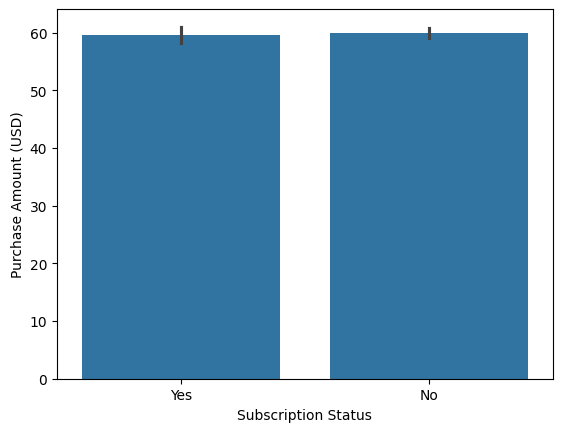

In [ ]:
sns.barplot(data=shop, x='Subscription Status', y='Purchase Amount (USD)')

In [ ]:
total_purchase = shop["Purchase Amount (USD)"].sum()
print("Total Purchase Amount (USD):", total_purchase)


Total Purchase Amount (USD): 233081


In [ ]:
mean_purchase_by_status = shop.groupby('Subscription Status')['Purchase Amount (USD)'].mean()
print(mean_purchase_by_status)


Subscription Status
No     59.865121
Yes    59.491928
Name: Purchase Amount (USD), dtype: float64


8.	Which payment method is the most popular among customers?

In [ ]:
shop_groupby = shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().sort_values(ascending=False)
print(shop_groupby)


Payment Method
Debit Card       60.915094
Credit Card      60.074516
Bank Transfer    59.712418
Cash             59.704478
PayPal           59.245199
Venmo            58.949527
Name: Purchase Amount (USD), dtype: float64


In [ ]:
# Group by 'Payment Method' and calculate the mean of 'Purchase Amount (USD)'
shop_groupby = shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().reset_index()

# Create a bar chart
fig = px.bar(shop_groupby, x='Payment Method', y='Purchase Amount (USD)',
             title='Average Purchase Amount by Payment Method',
             labels={'Purchase Amount (USD)': 'Average Purchase Amount (USD)'})

# Show the chart
fig.show()


9.	Do customers who use promo codes tend to spend more than those who don't?

In [ ]:
# Group by 'Promo Code Used' and calculate the sum of 'Purchase Amount (USD)'
shop_groupby = shop.groupby('Promo Code Used')['Purchase Amount (USD)'].sum().reset_index()

# Create a sunburst chart
fig = px.sunburst(shop, path=['Gender', 'Promo Code Used'], values='Purchase Amount (USD)',
                  title='Purchase Amount by Gender and Promo Code Used')

# Show the chart
fig.show()


In [ ]:
# Create a bar chart
fig = px.bar(shop_groupby, x='Promo Code Used', y='Purchase Amount (USD)',
             title='Total Purchase Amount by Promo Code Used')

# Show the chart
fig.show()

10.	How does the frequency of purchases vary across different age groups?

In [ ]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [ ]:
# Create 'Age_category' based on 'Age'
shop['Age_category'] = pd.cut(shop['Age'], bins=[0, 18, 35, 50, 100], labels=['0-18', '19-35', '36-50', '50+'])

# Now you can select the 'Age' and 'Age_category' columns
print(shop[['Age', 'Age_category']])


      Age Age_category
0      55          50+
1      19        19-35
2      50        36-50
3      21        19-35
4      45        36-50
...   ...          ...
3895   40        36-50
3896   52          50+
3897   46        36-50
3898   44        36-50
3899   52          50+

[3900 rows x 2 columns]


In [ ]:
shop[['Age', 'Age_category']]


,Age,Age_category
0,55,50+
1,19,19-35
2,50,36-50
3,21,19-35
4,45,36-50
...,...,...
3895,40,36-50
3896,52,50+
3897,46,36-50
3898,44,36-50


In [ ]:
# Get unique values in the 'Age_category' column
unique_age_categories = shop['Age_category'].unique()
print(unique_age_categories)

# Group by 'Frequency of Purchases' and calculate the sum of 'Age'
shop_group = shop.groupby('Frequency of Purchases')['Age'].sum().reset_index()

# Create a sunburst chart

fig = px.sunburst(shop, path=['Frequency of Purchases', 'Age_category'], values='Age',
                  title='Age Distribution by Frequency of Purchases')

# Show the chart
fig.show()


['50+', '19-35', '36-50', '0-18']
Categories (4, object): ['0-18' < '19-35' < '36-50' < '50+']


/usr/local/lib/python3.11/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



11.	Are there any correlations between the size of the product and the purchase amount?

In [ ]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [ ]:
# Group by 'Size' and calculate the sum of 'Purchase Amount (USD)'
shop_group = shop.groupby('Size')['Purchase Amount (USD)'].sum().reset_index()

# Create a bar chart
fig = px.bar(shop_group, x='Size', y='Purchase Amount (USD)',
             title='Total Purchase Amount by Size')

# Show the chart
fig.show()


12.	Which shipping type is preferred by customers for different product categories?

In [ ]:
# Group by 'Category', count occurrences of 'Shipping Type' for each category, and sort the values
shop_group = shop.groupby('Category')['Shipping Type'].value_counts().sort_values(ascending=False).reset_index(name='Count')

# Display the result
print(shop_group)


       Category   Shipping Type  Count
0      Clothing        Standard    297
1      Clothing   Free Shipping    294
2      Clothing    Next Day Air    293
3      Clothing         Express    290
4      Clothing    Store Pickup    282
5      Clothing  2-Day Shipping    281
6   Accessories    Store Pickup    217
7   Accessories    Next Day Air    211
8   Accessories        Standard    208
9   Accessories  2-Day Shipping    206
10  Accessories         Express    203
11  Accessories   Free Shipping    195
12     Footwear   Free Shipping    122
13     Footwear        Standard    100
14     Footwear    Store Pickup     98
15     Footwear         Express     96
16     Footwear    Next Day Air     93
17     Footwear  2-Day Shipping     90
18    Outerwear   Free Shipping     64
19    Outerwear         Express     57
20    Outerwear    Store Pickup     53
21    Outerwear    Next Day Air     51
22    Outerwear  2-Day Shipping     50
23    Outerwear        Standard     49


13.	How does the presence of a discount affect the purchase decision of customers?

In [ ]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [ ]:
# Group by 'Discount Applied' and calculate the sum of 'Purchase Amount (USD)'
shop_group = shop.groupby('Discount Applied')['Purchase Amount (USD)'].sum().reset_index()

# Create a histogram (though it's more common to use bar charts for this kind of data)
fig = px.bar(shop_group, x='Discount Applied', y='Purchase Amount (USD)',
             title='Total Purchase Amount by Discount Applied')

# Show the chart
fig.show()


In [ ]:
# Create a sunburst chart
fig = px.sunburst(shop, path=['Gender', 'Discount Applied'],
                  values='Purchase Amount (USD)', color='Gender',
                  title='Purchase Amount by Gender and Discount Applied')

# Show the chart
fig.show()

14.	Are there any specific colors that are more popular among customers?

In [ ]:
# Create a histogram based on the 'Color' column
fig = px.histogram(shop, x='Color', title='Distribution of Purchases by Color')

# Show the chart
fig.show()


In [ ]:
# Get the top 5 most common colors
top_colors = shop['Color'].value_counts().nlargest(5)

# Display the result
print(top_colors)


Color
Olive     177
Yellow    174
Silver    173
Teal      172
Green     169
Name: count, dtype: int64


15.	What is the average number of previous purchases made by customers?

In [ ]:
# Calculate the mean of 'Previous Purchases'
mean_previous_purchases = shop['Previous Purchases'].mean()

# Display the result
print(mean_previous_purchases)


25.35153846153846


16.	How does the purchase amount differ based on the review ratings given by customers?

In [ ]:
# Group by 'Location', calculate the mean of 'Purchase Amount (USD)', and sort in descending order
shop_group = shop.groupby('Location')['Purchase Amount (USD)'].mean().sort_values(ascending=False).reset_index()

# Display the result
print(shop_group)


          Location  Purchase Amount (USD)
0           Alaska              67.597222
1     Pennsylvania              66.567568
2          Arizona              66.553846
3    West Virginia              63.876543
4           Nevada              63.379310
5       Washington              63.328767
6     North Dakota              62.891566
7         Virginia              62.883117
8             Utah              62.577465
9         Michigan              62.095890
10       Tennessee              61.974026
11      New Mexico              61.901235
12    Rhode Island              61.444444
13           Texas              61.194805
14        Arkansas              61.113924
15        Illinois              61.054348
16     Mississippi              61.037500
17   Massachusetts              60.888889
18            Iowa              60.884058
19  North Carolina              60.794872
20         Wyoming              60.690141
21    South Dakota              60.514286
22        New York              60

In [ ]:
# Group by 'Location', calculate the mean of 'Purchase Amount (USD)', and reset the index
shop_group = shop.groupby('Location')['Purchase Amount (USD)'].mean().reset_index()

# Create a bar chart
fig = px.bar(shop_group, x='Location', y='Purchase Amount (USD)',
             title='Average Purchase Amount by Location')

# Show the chart
fig.show()


17.	Are there any noticeable differences in purchase behavior between different locations?

In [ ]:
# Group by 'Category', calculate the mean of 'Age', and reset the index
shop_group = shop.groupby('Category')['Age'].mean().reset_index()

# Create a bar chart
fig = px.bar(shop_group, x='Category', y='Age', title='Average Age by Category')

# Show the chart
fig.show()


18.	Is there a relationship between customer age and the category of products they purchase?

In [ ]:
# Group by 'Gender', calculate the sum of 'Purchase Amount (USD)', and reset the index
shop_group = shop.groupby('Gender')['Purchase Amount (USD)'].sum().reset_index()

# Create a bar chart
fig = px.bar(shop_group, x='Gender', y='Purchase Amount (USD)', title='Total Purchase Amount by Gender')

# Show the chart
fig.show()

In [ ]:
# Create a sunburst chart
fig = px.sunburst(shop, path=['Gender', 'Age_category'], values='Purchase Amount (USD)',
                  title='Purchase Amount by Gender and Age Category')

# Show the chart
fig.show()

/usr/local/lib/python3.11/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
##Descriptive Anaylysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
# Categorize the 'Age' column into age groups
shop['Age_category'] = pd.cut(shop['Age'], bins=[0, 10, 15, 18, 30, 50, 70],
                              labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Middle Aged', 'Senior'])
shop.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age_category
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Senior
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Adult
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Middle Aged
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Adult
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Middle Aged


In [ ]:
fig=px.histogram(shop,y='Age',x='Age_category')
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season', 'Review Rating', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Previous Purchases', 'Payment Method', 'Frequency of Purchases'] but received: Age_category

(array([212., 206., 153., 231., 147., 224., 214., 147., 226., 159., 199.,
        223., 155., 226., 147., 243., 213., 148., 197., 230.]),
 array([18. , 20.6, 23.2, 25.8, 28.4, 31. , 33.6, 36.2, 38.8, 41.4, 44. ,
        46.6, 49.2, 51.8, 54.4, 57. , 59.6, 62.2, 64.8, 67.4, 70. ]),
 <BarContainer object of 20 artists>)

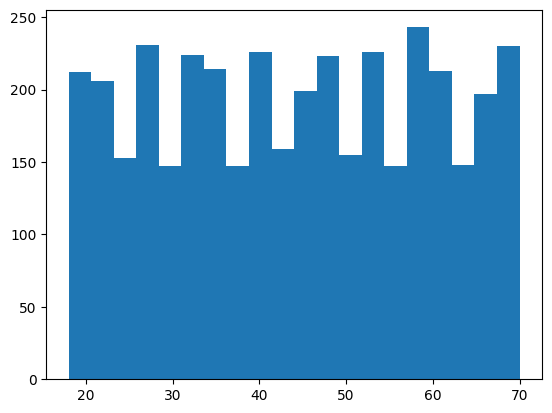

In [ ]:
plt.hist(shop["Age"],bins=20)

In [ ]:
shop["Gender"].value_counts()

,count
Gender,
Male,2652
Female,1248


<Axes: xlabel='Gender'>

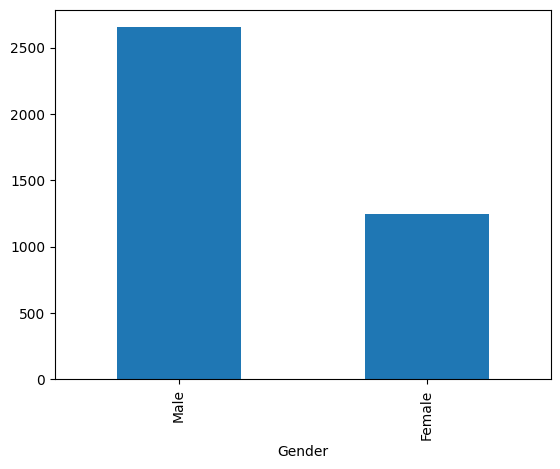

In [ ]:
shop["Gender"].value_counts().plot(kind="bar")

Text(0, 0.5, 'Count')

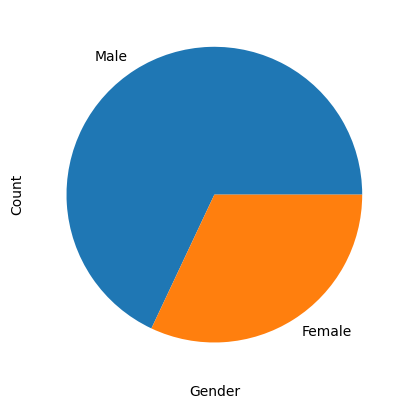

In [ ]:
data=shop["Gender"].value_counts()
data.plot(kind="pie")
plt.xlabel("Gender")
plt.ylabel("Count")

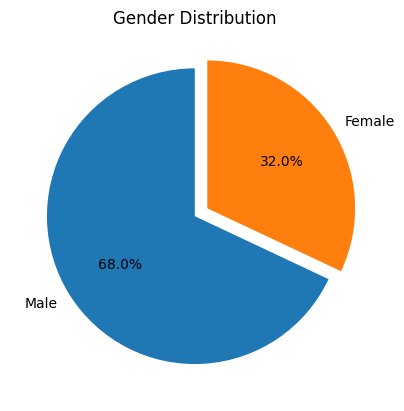

In [ ]:
data=shop["Gender"].value_counts()
 #Assuming `data` is already calculated


# Plot the pie chart
data.plot(kind="pie", explode=(0, 0.1), autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution")
plt.ylabel("")  # Optional, to remove 'ylabel' in the pie chart
plt.show()

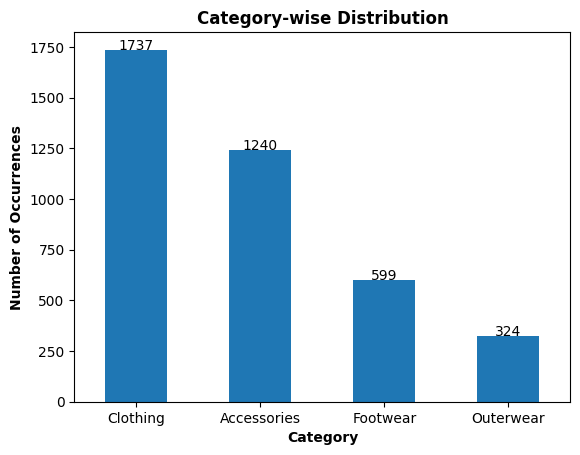

In [ ]:
# Generate a bar plot for Category value counts
ax = shop['Category'].value_counts().plot(kind='bar', rot=0)

# Add annotations on top of each bar
for p in ax.patches:
    ax.annotate(
        int(p.get_height()),
        (p.get_x() + p.get_width() / 2, p.get_height() + 1),
        ha='center'
    )

# Set labels and style
plt.xlabel("Category", weight='bold')
plt.ylabel("Number of Occurrences", weight='bold')
plt.title("Category-wise Distribution", weight='bold')
plt.show()

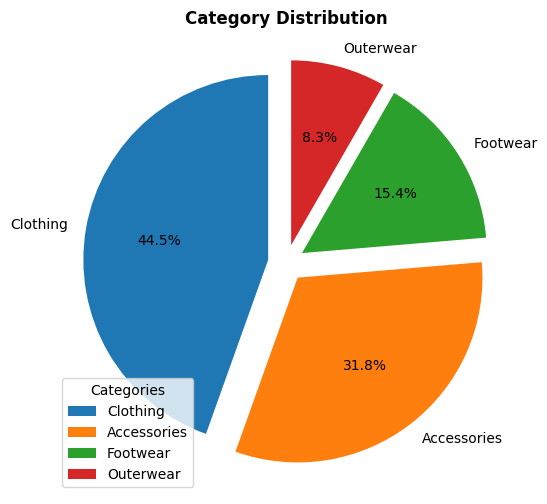

In [ ]:
# Set the figure size
plt.figure(figsize=(20,6))

# Calculate the value counts for the 'Category' column
data = shop["Category"].value_counts()

# Define the explode values for each slice
explode = [0.1] * len(data)  # Explodes all categories equally

# Plot the pie chart
data.plot(
    kind="pie",
    explode=explode,
    autopct='%1.1f%%',
    startangle=90
)

# Add a legend and title
plt.title("Category Distribution", weight='bold')
plt.ylabel("")
plt.legend(title="Categories")
plt.show()

In [ ]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [ ]:
shop["Subscription Status"].unique()

array(['Yes', 'No'], dtype=object)

<Axes: xlabel='Subscription Status', ylabel='Purchase Amount (USD)'>

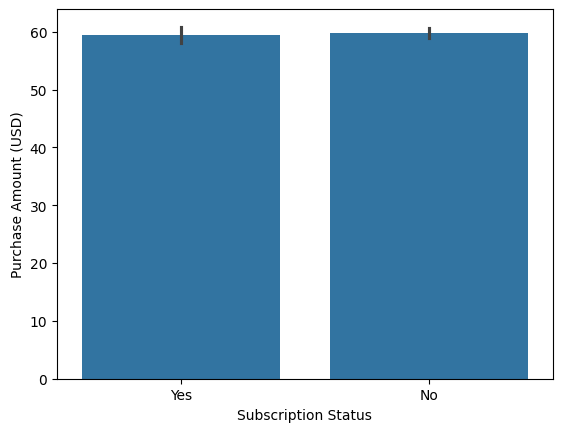

In [ ]:
sns.barplot(shop,x='Subscription Status',y='Purchase Amount (USD)')

<Axes: xlabel='Gender', ylabel='Purchase Amount (USD)'>

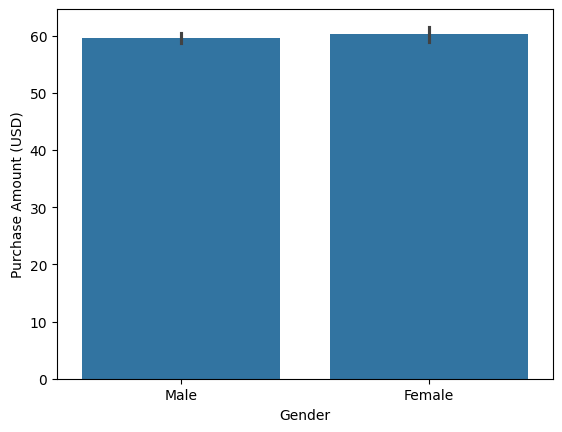

In [ ]:
sns.barplot(shop,x='Gender',y='Purchase Amount (USD)')

In [ ]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [ ]:
data=shop['Seasopn'].value_counts()

In [ ]:
##8.Which payment method is the most popular among customers?


In [ ]:
# Group by 'Payment Method' and calculate the mean of 'Purchase Amount (USD)'
result = shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().sort_values(ascending=False)

# Display the result
print(result)


Payment Method
Debit Card       60.915094
Credit Card      60.074516
Bank Transfer    59.712418
Cash             59.704478
PayPal           59.245199
Venmo            58.949527
Name: Purchase Amount (USD), dtype: float64


<Axes: xlabel='Payment Method', ylabel='Purchase Amount (USD)'>

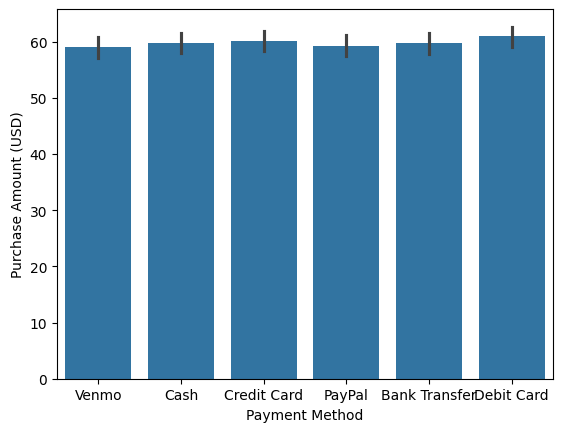

In [ ]:
sns.barplot(x='Payment Method',y='Purchase Amount (USD)',data=shop)

In [ ]:
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [ ]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Customer ID             3900 non-null   int64   
 1   Age                     3900 non-null   int64   
 2   Gender                  3900 non-null   object  
 3   Item Purchased          3900 non-null   object  
 4   Category                3900 non-null   object  
 5   Purchase Amount (USD)   3900 non-null   int64   
 6   Location                3900 non-null   object  
 7   Size                    3900 non-null   object  
 8   Color                   3900 non-null   object  
 9   Season                  3900 non-null   object  
 10  Review Rating           3900 non-null   float64 
 11  Subscription Status     3900 non-null   object  
 12  Shipping Type           3900 non-null   object  
 13  Discount Applied        3900 non-null   object  
 14  Promo Code Used         

In [ ]:
num_fea=shop[["Age","Purchase Amount (USD)","Review Rating","Discount Applied"]]
num_fea.head()

,Age,Purchase Amount (USD),Review Rating,Discount Applied
0,55,53,3.1,Yes
1,19,64,3.1,Yes
2,50,73,3.1,Yes
3,21,90,3.5,Yes
4,45,49,2.7,Yes


In [ ]:
# Select only numeric columns from num_fea
numeric_features = num_fea.select_dtypes(include=['number'])

# Compute the correlation matrix
cor_mat = numeric_features.corr()

# Display the correlation matrix
print(cor_mat)


                            Age  Purchase Amount (USD)  Review Rating
Age                    1.000000              -0.010424      -0.021949
Purchase Amount (USD) -0.010424               1.000000       0.030776
Review Rating         -0.021949               0.030776       1.000000


<Axes: >

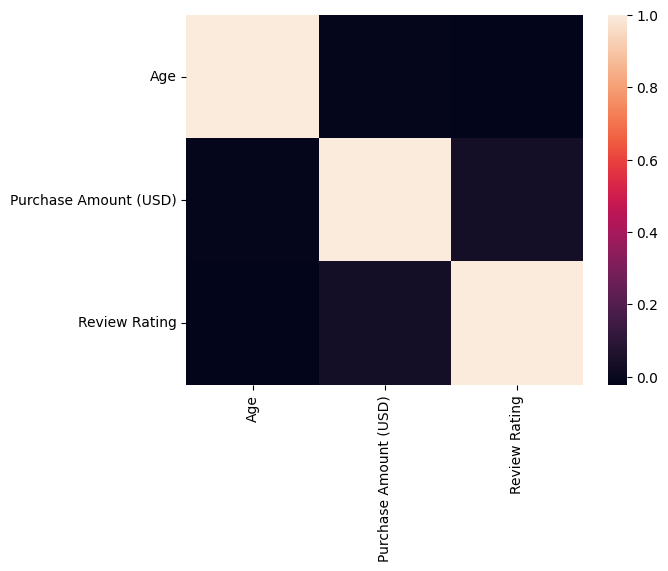

In [ ]:
sns.heatmap(cor_mat)

<Axes: >

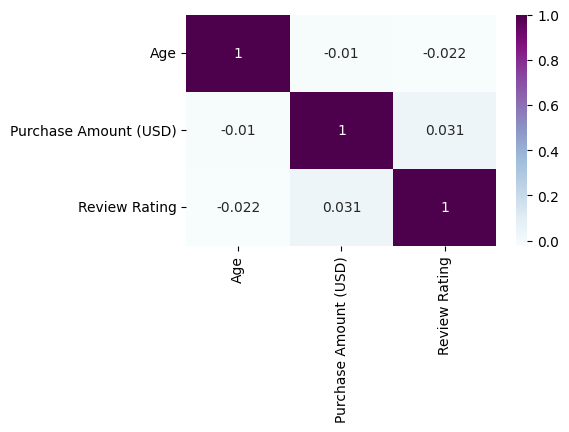

In [ ]:
plt.figure(figsize=(5,3))
# Plot the heatmap of the correlation matrix
sns.heatmap(cor_mat, annot=True, cmap="BuPu")